# Reddit Data Analaysis

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates

import psycopg2
import csv

from dotenv import load_dotenv
load_dotenv()

import os


In [115]:

FAKTORY_SERVER_URL = os.environ.get("FAKTORY_SERVER_URL")
DATABASE_URL = os.environ.get("DATABASE_URL")

## Posts and comments per subreddit

In [116]:
def fetch_data_from_reddit_db(DATABASE_URL, query):
    try:
        # Create the connection string
        conn = psycopg2.connect(dsn=DATABASE_URL)
        # Query data from the table
        # query = """
        # SELECT subreddit, count(*) from posts group by subreddit;
        # """
        df = pd.read_sql_query(query, conn)
        conn.close()
        return df
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None


In [117]:
posts_per_subreddit_query_before_nov17 = """
SELECT subreddit, count(*) as count from posts group by subreddit;
"""

posts_per_subreddit_query_after_nov17 = """
select subreddit, count(*) as count from posts_from_nov17 group by subreddit
"""

comments_per_subreddit_query_before_nov17 = """
SELECT p.subreddit, COUNT(c.comment_id) AS count
FROM Posts p
JOIN comments c ON p.post_id = c.post_id
GROUP BY p.subreddit;
"""

comments_per_subreddit_query_after_nov17 = """
select subreddit, count(*) as count from comments_from_nov17th group by subreddit
"""

In [118]:

posts_per_subreddit_df_before_nov_17 = fetch_data_from_reddit_db(DATABASE_URL, posts_per_subreddit_query_before_nov17)
posts_per_subreddit_df_after_nov_17 = fetch_data_from_reddit_db(DATABASE_URL, posts_per_subreddit_query_after_nov17)

comments_per_subreddit_df_before_nov17 = fetch_data_from_reddit_db(DATABASE_URL, comments_per_subreddit_query_before_nov17)
comments_per_subreddit_df_after_nov17 = fetch_data_from_reddit_db(DATABASE_URL, comments_per_subreddit_query_after_nov17)

/tmp/ipykernel_1457687/2278954275.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [119]:
posts_per_subreddit_df = pd.concat([posts_per_subreddit_df_before_nov_17, posts_per_subreddit_df_after_nov_17])
comments_per_subreddit_df = pd.concat([comments_per_subreddit_df_before_nov17, comments_per_subreddit_df_after_nov17])

In [120]:
print(posts_per_subreddit_df.shape)
print(posts_per_subreddit_df.head())


(20, 2)
  subreddit  count
0       mlb    278
1    soccer   4362
2       CFB   1327
3       nba   2079
4    sports    712


In [121]:
print(comments_per_subreddit_df.shape)
print(comments_per_subreddit_df.head())

(20, 2)
  subreddit  count
0       CFB  31009
1   Cricket  65265
2  football   6041
3  formula1  11039
4       mlb   6626


In [122]:
def plot_data_per_subreddit(df, title):
    try:
        plt.figure(figsize=(10, 6))
        plt.bar(df['subreddit'], df['count'])
        plt.title(title, fontsize=16)
        plt.xlabel("Board", fontsize=12)
        plt.ylabel("Posts Count", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting histogram: {e}")

### Fig 1: Posts count per subreddit

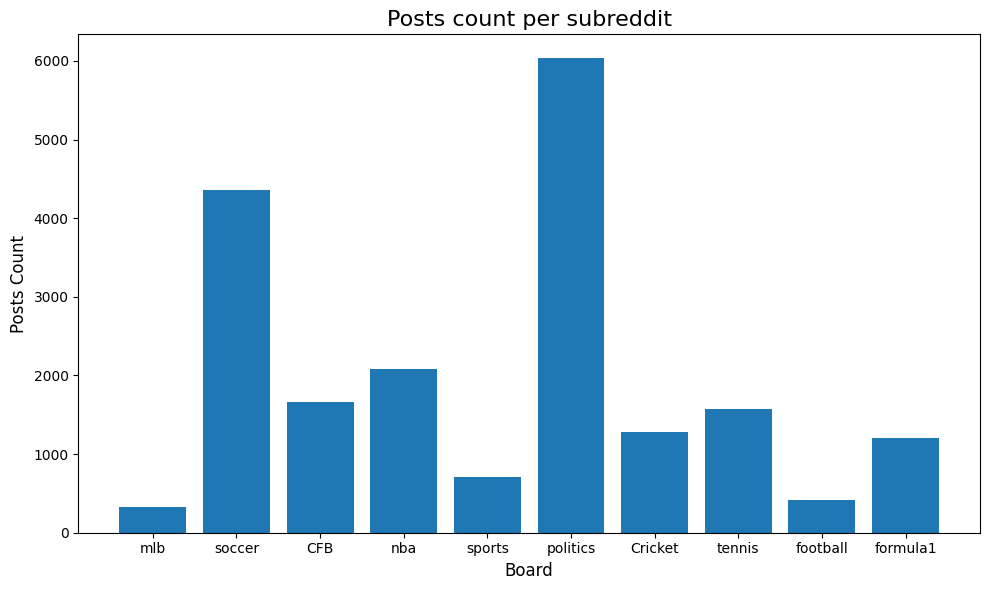

In [123]:
plot_data_per_subreddit(posts_per_subreddit_df, "Posts count per subreddit")

### Fig 2: Comments count per subreddit

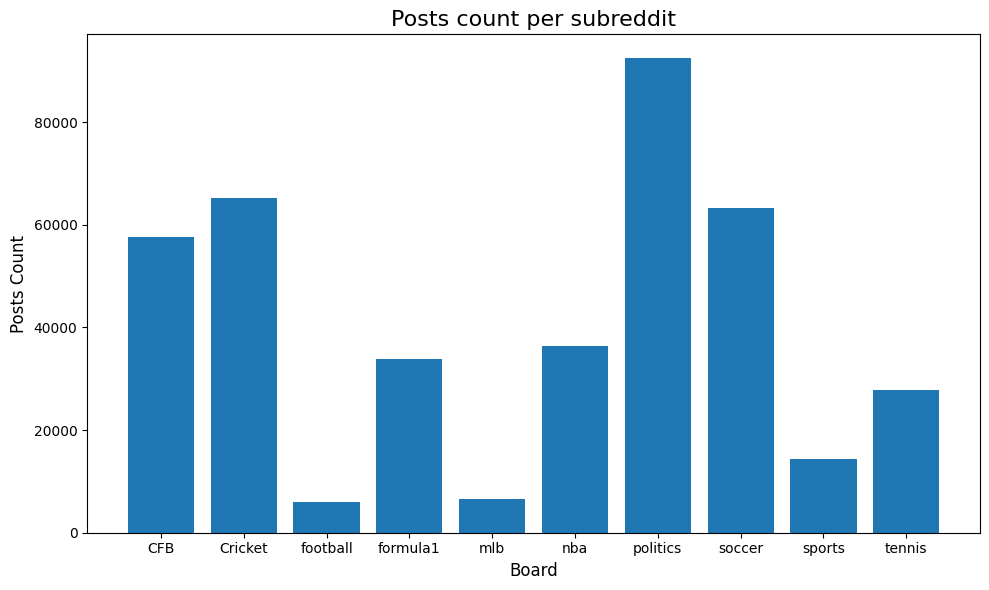

In [124]:
plot_data_per_subreddit(comments_per_subreddit_df, "Posts count per subreddit")

## Posts and comments per day

In [125]:
posts_per_day_query_before_nov17 = """
SELECT DATE(created_at) as date , count(*) as count from posts group by date order by date;
"""

posts_per_day_query_after_nov17 = """
SELECT DATE(created_at) as date , count(*) as count from posts_from_nov17 group by date order by date;
"""

comments_per_day_query_before_nov17 = """
SELECT DATE(created_at) as date , count(*) as count from comments group by date order by date;
"""

comments_per_day_query_after_nov17 = """
SELECT DATE(created_at) as date , count(*) as count from comments_from_nov17th group by date order by date;
"""

In [126]:
posts_per_day_df_before_nov17 = fetch_data_from_reddit_db(DATABASE_URL, posts_per_day_query_before_nov17)
posts_per_day_df_after_nov17 = fetch_data_from_reddit_db(DATABASE_URL, posts_per_day_query_after_nov17)
comments_per_day_df_before_nov17 = fetch_data_from_reddit_db(DATABASE_URL, comments_per_day_query_before_nov17)
comments_per_day_df_after_nov17 = fetch_data_from_reddit_db(DATABASE_URL, comments_per_day_query_after_nov17)

/tmp/ipykernel_1457687/2278954275.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [127]:
posts_per_day_df = pd.concat([posts_per_day_df_before_nov17, posts_per_day_df_after_nov17])
comments_per_day_df = pd.concat([comments_per_day_df_before_nov17, comments_per_day_df_after_nov17])

In [128]:
# posts_per_day_df = posts_per_day_df.drop_duplicates(subset='date', keep='first')
posts_per_day_df = posts_per_day_df.groupby('date', as_index=False)['count'].sum()


# comments_per_day_df = comments_per_day_df. drop_duplicates(subset='date', keep='first')
comments_per_day_df = comments_per_day_df.groupby('date', as_index=False)['count'].sum()

In [129]:
print(posts_per_day_df.shape)
print(posts_per_day_df.head())

(45, 2)
         date  count
0  2024-10-19      4
1  2024-10-20      6
2  2024-10-21     49
3  2024-10-22    181
4  2024-10-23     23


In [130]:
print(comments_per_day_df.shape)
print(comments_per_day_df.head())

(43, 2)
         date  count
0  2024-10-21    123
1  2024-10-22   1602
2  2024-10-23    264
3  2024-10-24   2012
4  2024-10-25   9486


In [131]:

def plot_per_day_data(df, title, x_label="Date", y_label="Count", line_color="blue"):
    """
    Plot data per day from a dataframe with 'date' and 'count' columns.

    Args:
        df (pd.DataFrame): DataFrame with 'date' and 'count' columns.
        title (str): Title for the plot.
        x_label (str): Label for the x-axis. Default is 'Date'.
        y_label (str): Label for the y-axis. Default is 'Count'.
        line_color (str): Color of the line in the plot. Default is 'blue'.
    """
    # Ensure the 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['count'], marker='o', color=line_color, linewidth=2)
    plt.title(title, fontsize=16)
    plt.xticks(df['date'], rotation = 45)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Fig 3: Posts per day

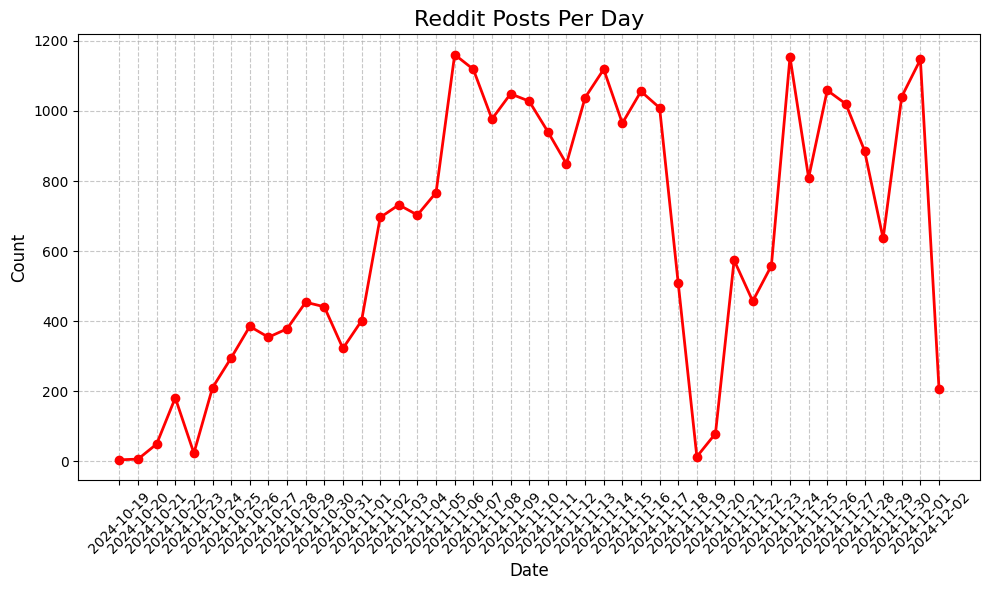

In [132]:
plot_per_day_data(posts_per_day_df, "Reddit Posts Per Day", line_color="red")


### Fig 4: Comments per day

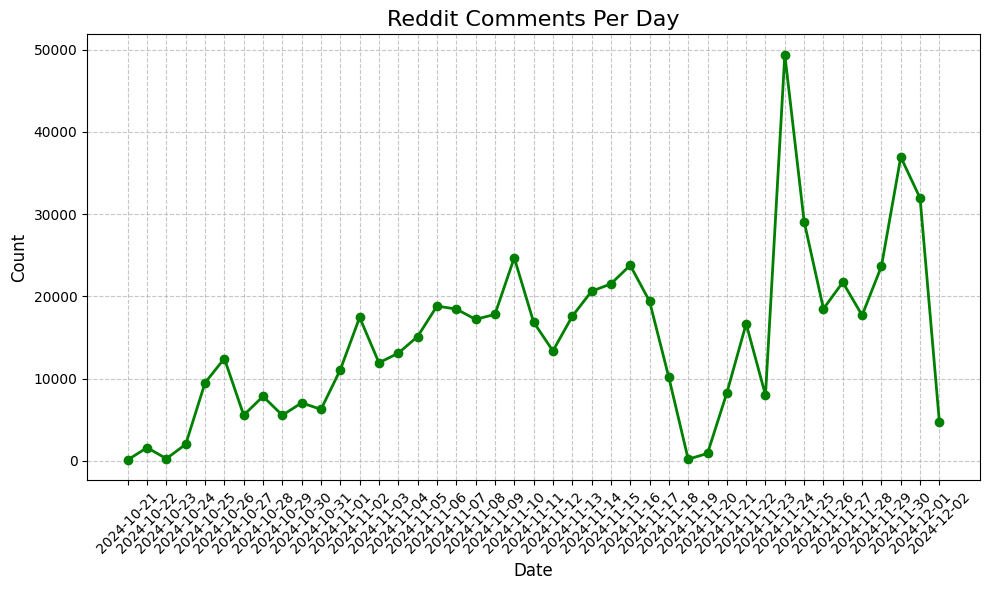

In [133]:
plot_per_day_data(comments_per_day_df, "Reddit Comments Per Day", line_color="green")

## Posts and comments for r/polictics

In [134]:
def fetch_data_from_postgres(table_name):
    """
    Extract data from PostgreSQL table and load it into a Pandas DataFrame.

    Args:
        table_name (str): The name of the table to query.
        connection_params (dict): A dictionary with connection parameters (host, dbname, user, password, port).

    Returns:
        pd.DataFrame: A DataFrame containing the table data.
    """
    try:
        # Create the connection string
        conn = psycopg2.connect(dsn=DATABASE_URL)
        # Query data from the table
        query = f"SELECT * FROM {table_name};"
        df = pd.read_sql_query(query, conn)
        conn.close()
        return df
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

In [135]:
# Fetch data for posts
posts_df = fetch_data_from_postgres("posts")

/tmp/ipykernel_1457687/2118298839.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [136]:
# Fetch data for comments
comments_df = fetch_data_from_postgres("comments")

/tmp/ipykernel_1457687/2118298839.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [137]:
# def plot_reddit_posts_per_day(posts_df):
#     """
#     Plot the number of Reddit posts collected for each day as a line plot.

#     Args:
#         posts_df (pd.DataFrame): DataFrame containing Reddit posts with a 'created_at' column.
#     """
#     # Ensure 'created_at' is in datetime format
#     posts_df['created_at'] = pd.to_datetime(posts_df['created_at'])
    
#     # Group by date and count the posts
#     posts_per_day = posts_df.groupby(posts_df['created_at'].dt.date).size()
    
#     # Plot the data
#     plt.figure(figsize=(10, 6))
#     posts_per_day.plot(kind='line', color='blue', linewidth=2, marker='o')
#     plt.title("Number of Reddit Posts Collected Per Day", fontsize=14)
#     plt.xlabel("Date", fontsize=12)
#     plt.ylabel("Number of Posts", fontsize=12)
#     plt.grid(True, linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.show()

In [138]:
# Plot posts per day
# plot_reddit_posts_per_day(posts_df)



In [139]:
# def plot_comments_per_day(comments_df):
#     """
#     Plot the number of comments collected for each day as a line plot.

#     Args:
#         comments_df (pd.DataFrame): DataFrame containing comments with a 'created_at' column.
#     """
#     # Ensure 'created_at' is in datetime format
#     comments_df['created_at'] = pd.to_datetime(comments_df['created_at'])
    
#     # Group by date and count the comments
#     comments_per_day = comments_df.groupby(comments_df['created_at'].dt.date).size()
    
#     # Plot the data
#     plt.figure(figsize=(10, 6))
#     comments_per_day.plot(kind='line', color='green', linewidth=2, marker='o')
#     plt.title("Number of Comments Collected Per Day", fontsize=14)
#     plt.xlabel("Date", fontsize=12)
#     plt.ylabel("Number of Comments", fontsize=12)
#     plt.grid(True, linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.show()


In [140]:
# Plot comments per day
# plot_comments_per_day(comments_df)

In [141]:
def plot_posts_per_day_politics(posts_df):
    """
    Plot the number of Reddit posts per day for the subreddit 'r/politics' as a line plot.

    Args:
        posts_df (pd.DataFrame): DataFrame containing Reddit posts with 'created_at' and 'subreddit' columns.
    """
    # Filter for r/politics
    politics_posts = posts_df[posts_df['subreddit'].str.lower() == 'politics']
    
    # Ensure 'created_at' is in datetime format
    politics_posts['created_at'] = pd.to_datetime(politics_posts['created_at'])

    # Define the date range with timezone awareness (UTC)
    start_date = pd.Timestamp("2024-11-01", tz="UTC")
    end_date = pd.Timestamp("2024-11-15", tz="UTC")
    politics_posts = politics_posts[(politics_posts['created_at'] >= start_date) & (politics_posts['created_at'] <= end_date)]
    
    # Group by date and count the posts
    posts_per_day = politics_posts.groupby(politics_posts['created_at'].dt.date).size()
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    posts_per_day.plot(kind='line', color='red', linewidth=2, marker='o')
    plt.title("Number of Posts Collected Per Day for r/politics", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of Posts", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Fig 5: Posts per day r/politics

/tmp/ipykernel_1457687/3734695434.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  politics_posts['created_at'] = pd.to_datetime(politics_posts['created_at'])


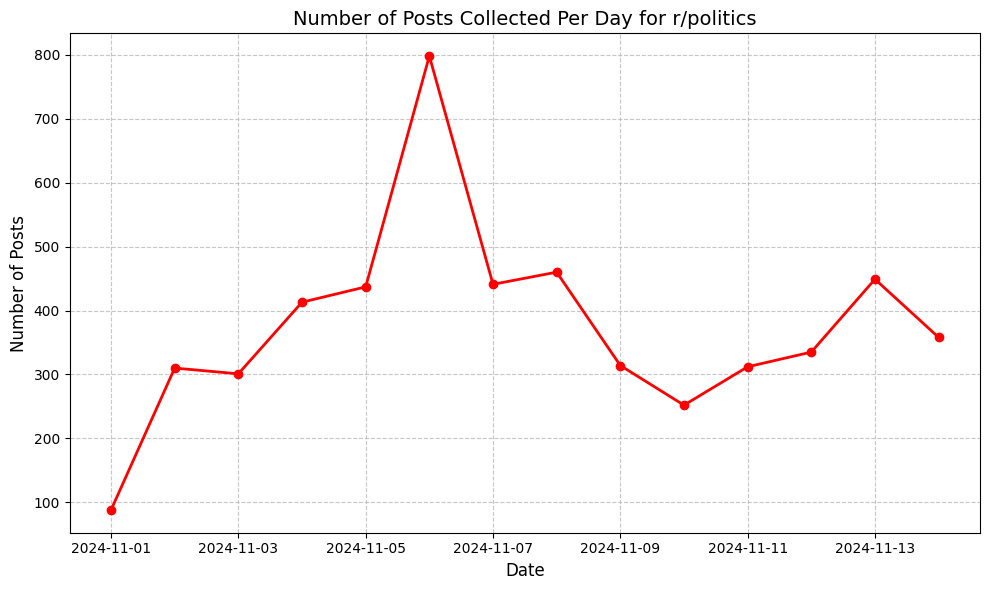

In [142]:
plot_posts_per_day_politics(posts_df)

In [143]:
def plot_comments_per_day_politics(comments_df, posts_df):
    """
    Plot the number of comments per day for the subreddit 'r/politics' as a line plot.

    Args:
        comments_df (pd.DataFrame): DataFrame containing comments with 'created_at' and 'post_id' columns.
        posts_df (pd.DataFrame): DataFrame containing posts with 'post_id' and 'subreddit' columns.
    """
    # Filter posts for r/politics
    politics_posts = posts_df[posts_df['subreddit'].str.lower() == 'politics']
    
    # Filter comments for r/politics using post_id
    politics_comments = comments_df[comments_df['post_id'].isin(politics_posts['post_id'])]
    
    # Ensure 'created_at' is in datetime format
    politics_comments['created_at'] = pd.to_datetime(politics_comments['created_at'])

    start_date = pd.Timestamp("2024-11-01", tz="UTC")
    end_date = pd.Timestamp("2024-11-15", tz="UTC")
    politics_comments = politics_comments[(politics_comments['created_at'] >= start_date) & (politics_comments['created_at'] <= end_date)]
    
    # Group by date and count the comments
    comments_per_day = politics_comments.groupby(politics_comments['created_at'].dt.date).size()
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    comments_per_day.plot(kind='line', color='purple', linewidth=2, marker='o')
    plt.title("Number of Comments Collected Per Day for r/politics", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of Comments", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Fig 6: Comments per day r/politics

/tmp/ipykernel_1457687/983445640.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  politics_comments['created_at'] = pd.to_datetime(politics_comments['created_at'])


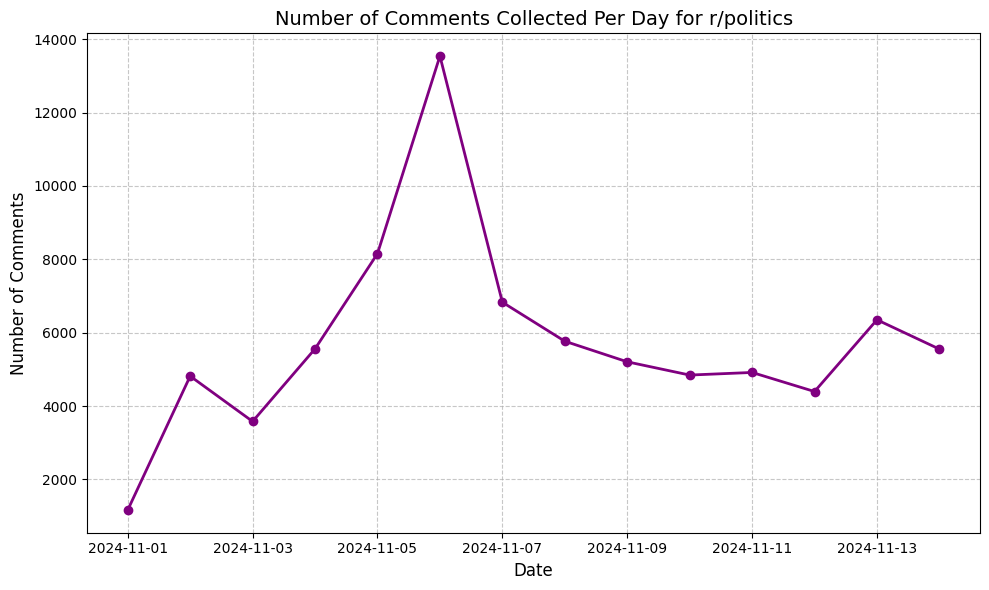

In [144]:
plot_comments_per_day_politics(comments_df, posts_df)

In [145]:
def plot_comments_per_hour_politics(comments_df, posts_df):
    """
    Plot the number of comments per hour for every day for the subreddit 'r/politics' as a line plot.

    Args:
        comments_df (pd.DataFrame): DataFrame containing comments with 'created_at' and 'post_id' columns.
        posts_df (pd.DataFrame): DataFrame containing posts with 'post_id' and 'subreddit' columns.
    """
    # Filter posts for r/politics
    politics_posts = posts_df[posts_df['subreddit'].str.lower() == 'politics']
    
    # Filter comments for r/politics using post_id
    politics_comments = comments_df[comments_df['post_id'].isin(politics_posts['post_id'])]
    
    # Ensure 'created_at' is in datetime format
    politics_comments['created_at'] = pd.to_datetime(politics_comments['created_at'])
    
    # Group by date and hour, and count the comments
    comments_per_hour = (
        politics_comments
        .groupby([politics_comments['created_at'].dt.date.rename('date'),
                  politics_comments['created_at'].dt.hour.rename('hour')])
        .size()
        .reset_index(name='count')
    )
    
    # Plot the data
    plt.figure(figsize=(14, 8))
    for date in comments_per_hour['date'].unique():
        daily_data = comments_per_hour[comments_per_hour['date'] == date]
        plt.plot(
            daily_data['hour'], daily_data['count'],
            marker='o', label=str(date)
        )
    
    # Configure plot details
    plt.title("Number of Comments Per Hour for Every Day in r/politics", fontsize=16)
    plt.xlabel("Hour of the Day (0-23)", fontsize=12)
    plt.ylabel("Number of Comments", fontsize=12)
    plt.legend(title="Date", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Fig 7: Comments per hour r/politics

/tmp/ipykernel_1457687/3346704675.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  politics_comments['created_at'] = pd.to_datetime(politics_comments['created_at'])


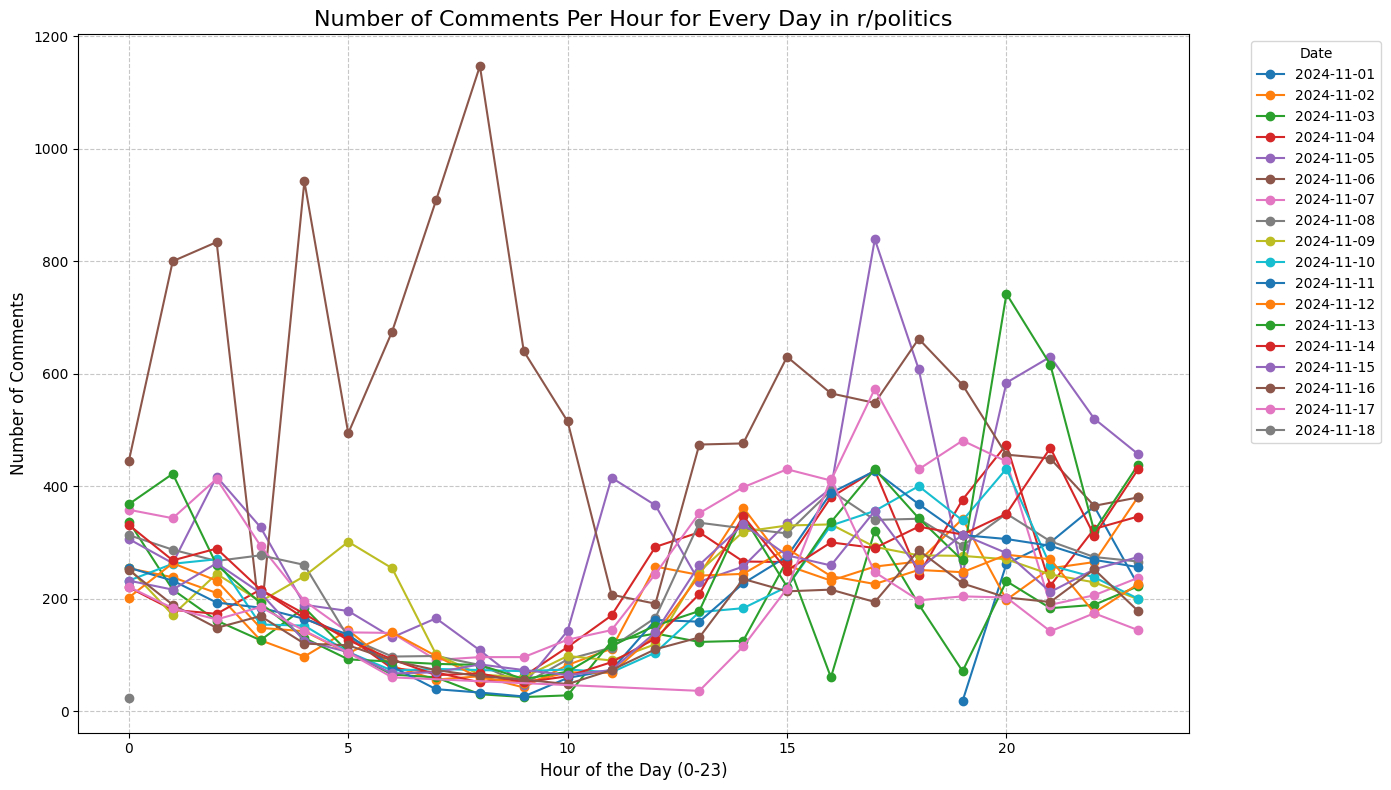

In [146]:
plot_comments_per_hour_politics(comments_df, posts_df)

### Comments per hr - approach 2

In [147]:
query_comments_per_hr = """
SELECT 
    DATE_TRUNC('hour', p.created_at) as hour, COUNT(c.comment_id) AS comment_count 
FROM 
    Posts p
JOIN 
    comments c ON p.post_id = c.post_id
where 
    p.created_at between '2024-11-01 00:00:00' AND '2024-11-14 23:59:59' 
group by 
    hour 
order by 
    hour;
"""

In [148]:
comments_per_hr_df = fetch_data_from_reddit_db(DATABASE_URL, query_comments_per_hr)

/tmp/ipykernel_1457687/2278954275.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [149]:
comments_per_hr_df.head()

,hour,comment_count
0,2024-11-01 00:00:00+00:00,201
1,2024-11-01 01:00:00+00:00,291
2,2024-11-01 02:00:00+00:00,4854
3,2024-11-01 03:00:00+00:00,195
4,2024-11-01 04:00:00+00:00,285


In [150]:
def plot_posts_per_hour(posts_per_hr_df, title, x_axis, y_axis, x_label, y_label):
    """
    Plot the number of posts per hour over 14 days.

    Args:
        posts_per_hr_df (pd.DataFrame): DataFrame containing 'hour' and 'post_count' columns.
    """
    # Ensure 'hour' is in datetime format
    posts_per_hr_df['hour'] = pd.to_datetime(posts_per_hr_df['hour'])
    
    # Plot the data
    plt.figure(figsize=(14, 8))
    plt.plot(posts_per_hr_df[x_axis], posts_per_hr_df[y_axis], color='blue', linewidth=2, marker='o', markersize=4)
    
    # Formatting x-axis for hourly intervals
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show ticks for each day
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
    plt.xticks(rotation=45, fontsize=10)
    
    # Adding titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    
    # Adding grid for better readability
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### Fig: Approach 2 Comments per hour - r/politics

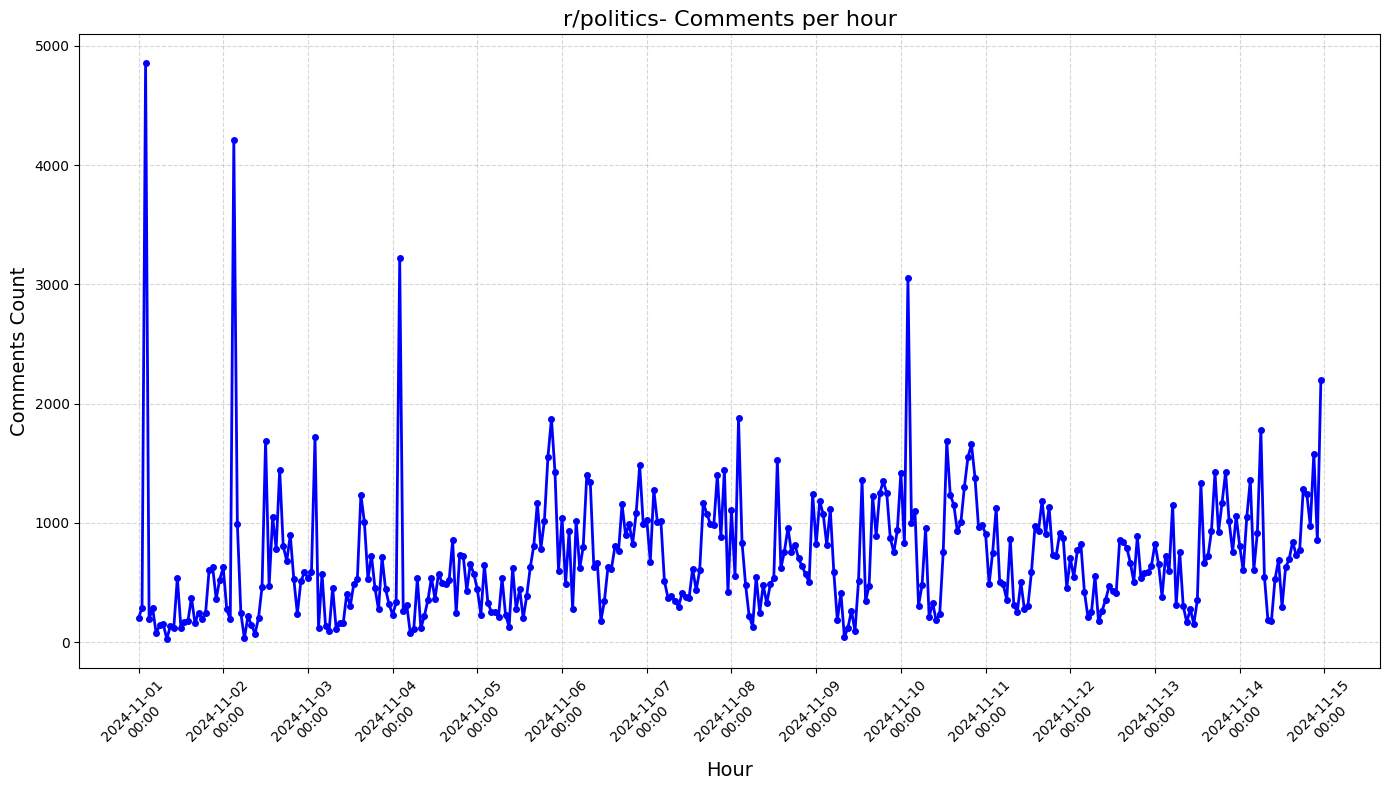

In [151]:
plot_posts_per_hour(comments_per_hr_df, title="r/politics- Comments per hour", 
                    x_axis='hour', y_axis='comment_count',
                    x_label='Hour', y_label="Comments Count")

## Reddit Comments - Flag vs Normal

In [152]:
query_flag_vs_normal_before_nov17 = """
SELECT 
    DATE(created_at) AS date,
    toxic_class,
    COUNT(*) AS count
FROM 
    comments
WHERE 
    toxic_class IN ('flag', 'normal') 
    AND DATE(created_at) BETWEEN '2024-10-15' AND '2024-12-30'
GROUP BY 
    date, toxic_class
ORDER BY 
    date, toxic_class;

"""


query_flag_vs_normal_after_nov17 = """
SELECT 
    DATE(created_at) AS date,
    toxic_class,
    COUNT(*) AS count
FROM 
    comments_from_nov17th
WHERE 
    toxic_class IN ('flag', 'normal') 
    AND DATE(created_at) BETWEEN '2024-10-15' AND '2024-12-30'
GROUP BY 
    date, toxic_class
ORDER BY 
    date, toxic_class;

"""

In [153]:
flag_vs_normal_df_before_nov17 = fetch_data_from_reddit_db(DATABASE_URL, query_flag_vs_normal_before_nov17)
flag_vs_normal_df_after_nov17 = fetch_data_from_reddit_db(DATABASE_URL, query_flag_vs_normal_after_nov17)

/tmp/ipykernel_1457687/2278954275.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [154]:
flag_vs_normal_df = pd.concat([flag_vs_normal_df_before_nov17, flag_vs_normal_df_after_nov17])
flag_vs_normal_df = flag_vs_normal_df.groupby(['date','toxic_class'], as_index=False)['count'].sum()
# flag_vs_normal_df = flag_vs_normal_df.drop_duplicates(subset='date', keep='first')

In [155]:
print(flag_vs_normal_df.shape)
print(flag_vs_normal_df.head())

(83, 3)
         date toxic_class  count
0  2024-10-21        flag      4
1  2024-10-21      normal    119
2  2024-10-22        flag      7
3  2024-10-22      normal   1593
4  2024-10-23        flag      2


In [156]:
def plot_overlay_bar_chart(df, title):
    """
    Plot an overlay bar chart with dates on x-axis and number of posts on y-axis.

    Args:
        df (pd.DataFrame): DataFrame with columns ['date', 'toxic_class', 'count'].
    """
    # Pivot the data to create separate columns for each toxic_class
    pivot_df = df.pivot(index='date', columns='toxic_class', values='count').fillna(0)

    # Plot the overlay bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(pivot_df.index, pivot_df['flag'], label='Toxic (flag)', color='red', alpha=0.7)
    plt.bar(pivot_df.index, pivot_df['normal'], label='Normal', color='green', alpha=0.7, bottom=pivot_df['flag'])

    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of Posts", fontsize=12)
    plt.legend()
    plt.xticks(df['date'], rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Fig : Comments - flag vs normal

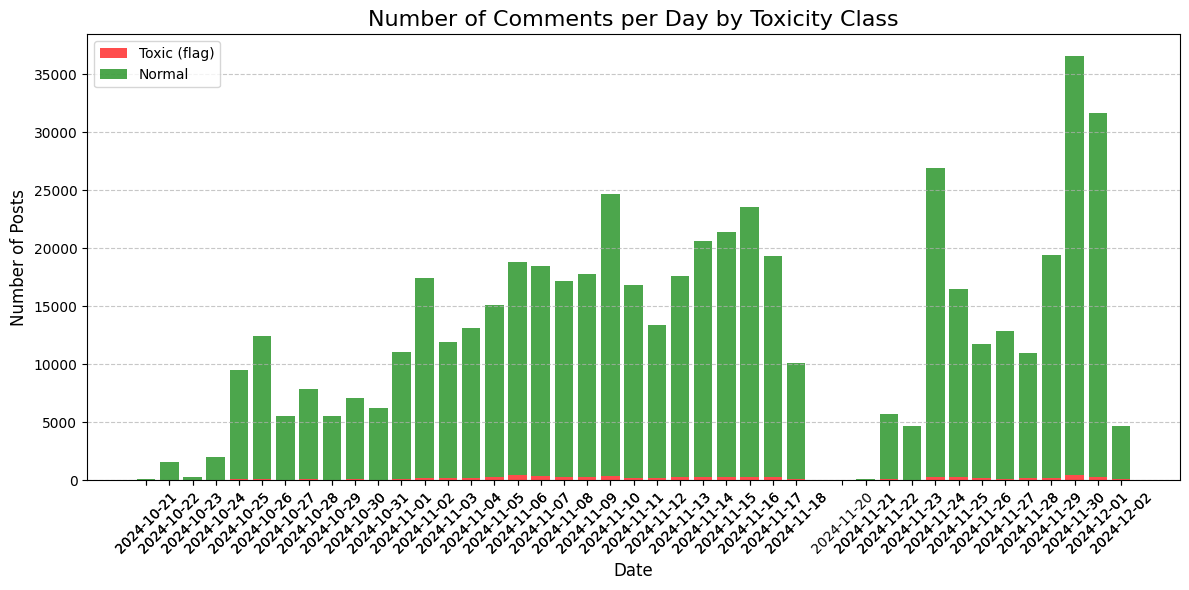

In [157]:
plot_overlay_bar_chart(flag_vs_normal_df, "Number of Comments per Day by Toxicity Class")

## Reddit Posts - Flag vs Normal

In [158]:
query_flag_vs_normal_before_nov17 = """
SELECT 
    DATE(created_at) AS date,
    toxic_class,
    COUNT(*) AS count
FROM 
    posts
WHERE 
    toxic_class IN ('flag', 'normal') 
    AND DATE(created_at) BETWEEN '2024-10-15' AND '2024-12-30'
GROUP BY 
    date, toxic_class
ORDER BY 
    date, toxic_class;

"""


query_flag_vs_normal_after_nov17 = """
SELECT 
    DATE(created_at) AS date,
    toxic_class,
    COUNT(*) AS count
FROM 
    posts_from_nov17
WHERE 
    toxic_class IN ('flag', 'normal') 
    AND DATE(created_at) BETWEEN '2024-10-15' AND '2024-12-30'
GROUP BY 
    date, toxic_class
ORDER BY 
    date, toxic_class;

"""

In [159]:
flag_vs_normal_df_before_nov17 = fetch_data_from_reddit_db(DATABASE_URL, query_flag_vs_normal_before_nov17)
flag_vs_normal_df_after_nov17 = fetch_data_from_reddit_db(DATABASE_URL, query_flag_vs_normal_after_nov17)

/tmp/ipykernel_1457687/2278954275.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [160]:
flag_vs_normal_df = pd.concat([flag_vs_normal_df_before_nov17, flag_vs_normal_df_after_nov17])
flag_vs_normal_df = flag_vs_normal_df.groupby(['date','toxic_class'], as_index=False)['count'].sum()

In [161]:
print(flag_vs_normal_df.shape)
print(flag_vs_normal_df.head())

(59, 3)
         date toxic_class  count
0  2024-10-19      normal      4
1  2024-10-20      normal      6
2  2024-10-21      normal     47
3  2024-10-22      normal    177
4  2024-10-23      normal     23


### Fig: Posts - Flag vs Normal

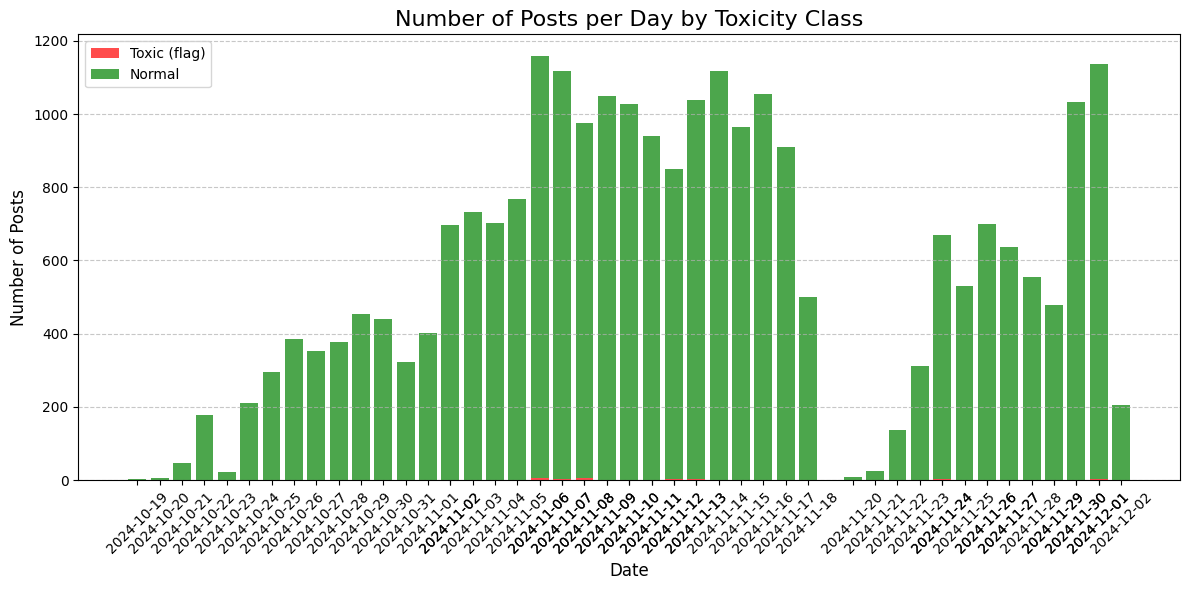

In [162]:
plot_overlay_bar_chart(flag_vs_normal_df, "Number of Posts per Day by Toxicity Class")

## Reddit Comments - Toxic and Non-toxic score 

In [163]:
def fetch_data_from_db(query):
    """
    Execute a query and return the result as a DataFrame.
    
    Args:
        query (str): SQL query to execute.
        conn_params (dict): Connection parameters for PostgreSQL.
    
    Returns:
        pd.DataFrame: Query results as a DataFrame.
    """
    try:
        # Establish the connection
        conn = psycopg2.connect(dsn=DATABASE_URL)
        # Execute the query
        df = pd.read_sql_query(query, conn)
        # Close the connection
        conn.close()
        return df
    except Exception as e:
        print(f"Error executing query: {e}")
        return None
    

def plot_avg_toxic_scores(non_toxic_df, toxic_df, title):
    """
    Plot average non-toxic and toxic scores by date.
    
    Args:
        non_toxic_df (pd.DataFrame): DataFrame with non-toxic scores.
        toxic_df (pd.DataFrame): DataFrame with toxic scores.
    """
    plt.figure(figsize=(12, 6))

    # Plot non-toxic scores
    plt.plot(non_toxic_df['date'], non_toxic_df['avg_non_toxic_score'], label='Non-Toxic Score', color='blue', marker='o')
    # Plot toxic scores
    plt.plot(toxic_df['date'], toxic_df['average_toxic_score'], label='Toxic Score', color='red', marker='o')

    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Average Score", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [184]:
query_non_toxic_before_nov17 = """
SELECT 
    DATE(created_at) AS date,
    AVG(toxic_score) AS avg_non_toxic_score
FROM 
    comments
WHERE 
    toxic_class != 'flag'
GROUP BY 
    DATE(created_at)
ORDER BY 
    date;
"""

query_non_toxic_after_nov17 = """
SELECT 
    DATE(created_at) AS date,
    AVG(toxic_score) AS avg_non_toxic_score
FROM 
    comments_from_nov17th
WHERE 
    toxic_class != 'flag'
GROUP BY 
    DATE(created_at)
ORDER BY 
    date;
"""

query_toxic_before_nov17 = """
SELECT 
    DATE(created_at) AS date,
    AVG(toxic_score) AS average_toxic_score
FROM 
    comments
WHERE 
    toxic_class = 'flag'
GROUP BY 
    DATE(created_at)
ORDER BY 
    date;
"""

query_toxic_after_nov17 = """
SELECT 
    DATE(created_at) AS date,
    AVG(toxic_score) AS average_toxic_score
FROM 
    comments_from_nov17th
WHERE 
    toxic_class = 'flag'
GROUP BY 
    DATE(created_at)
ORDER BY 
    date;
"""





In [185]:
# Fetch data
non_toxic_df_before_nov17 = fetch_data_from_db(query_non_toxic_before_nov17)
non_toxic_df_after_nov17 = fetch_data_from_db(query_non_toxic_after_nov17)
toxic_df_before_nov17 = fetch_data_from_db(query_toxic_before_nov17)
toxic_df_after_nov17 = fetch_data_from_db(query_toxic_after_nov17)

/tmp/ipykernel_1457687/3003459313.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [186]:
non_toxic_df = pd.concat([non_toxic_df_before_nov17, non_toxic_df_after_nov17])
toxic_df = pd.concat([toxic_df_before_nov17, toxic_df_after_nov17])

In [187]:
non_toxic_df = non_toxic_df.drop_duplicates(subset='date', keep='first')
# # non_toxic_df = non_toxic_df.groupby('date', as_index=False)['avg_non_toxic_score'].sum()


toxic_df = toxic_df. drop_duplicates(subset='date', keep='first')
# # toxic_df = toxic_df.groupby('date', as_index=False)['average_toxic_score'].sum()

### Fig 8: Toxic and non toxic comments

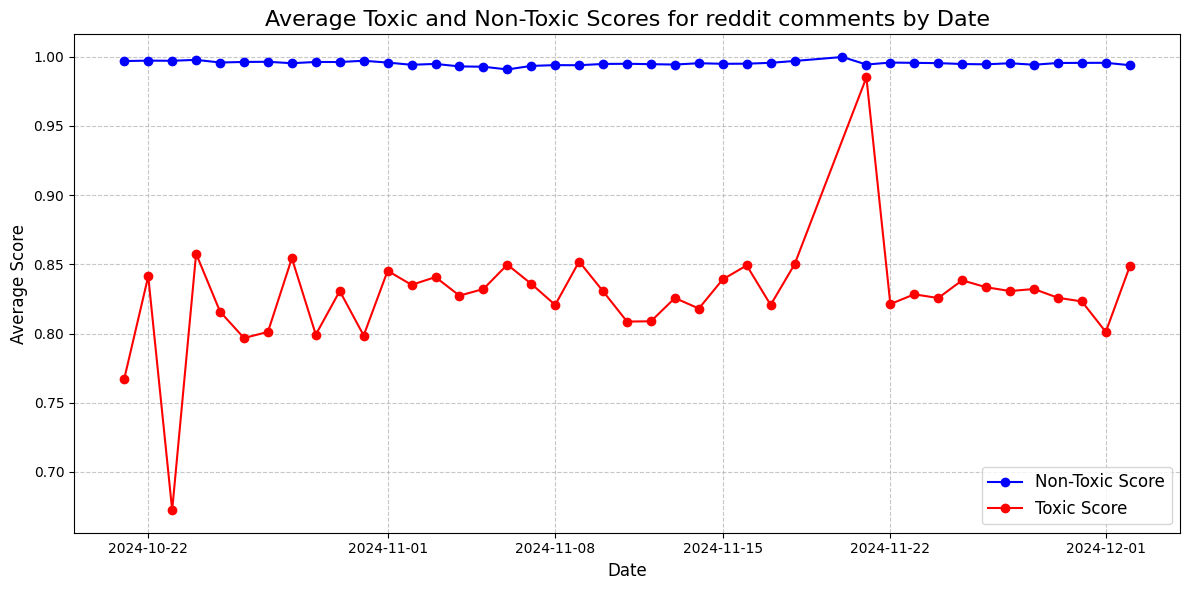

In [188]:
# Plot the data
if non_toxic_df is not None and toxic_df is not None:
    plot_avg_toxic_scores(non_toxic_df, toxic_df, "Average Toxic and Non-Toxic Scores for reddit comments by Date")

## Reddit Posts - Toxic and Non-toxic score 

In [189]:
query_non_toxic_before_nov17 = """
SELECT 
    DATE(created_at) AS date,
    AVG(toxic_score) AS avg_non_toxic_score
FROM 
    posts
WHERE 
    toxic_class = 'normal'
GROUP BY 
    DATE(created_at)
ORDER BY 
    date;
"""

query_non_toxic_after_nov17 = """
SELECT 
    DATE(created_at) AS date,
    AVG(toxic_score) AS avg_non_toxic_score
FROM 
    posts_from_nov17
WHERE 
    toxic_class = 'normal'
GROUP BY 
    DATE(created_at)
ORDER BY 
    date;
"""

query_toxic_before_nov17 = """
SELECT 
    DATE(created_at) AS date,
    AVG(toxic_score) AS average_toxic_score
FROM 
    posts
WHERE 
    toxic_class = 'flag'
GROUP BY 
    DATE(created_at)
ORDER BY 
    date;
"""

query_toxic_after_nov17 = """
SELECT 
    DATE(created_at) AS date,
    AVG(toxic_score) AS average_toxic_score
FROM 
    posts_from_nov17
WHERE 
    toxic_class = 'flag'
GROUP BY 
    DATE(created_at)
ORDER BY 
    date;
"""


In [190]:
# Fetch data
non_toxic_df_before_nov17 = fetch_data_from_db(query_non_toxic_before_nov17)
non_toxic_df_after_nov17 = fetch_data_from_db(query_non_toxic_after_nov17)
toxic_df_before_nov17 = fetch_data_from_db(query_toxic_before_nov17)
toxic_df_after_nov17 = fetch_data_from_db(query_toxic_after_nov17)

/tmp/ipykernel_1457687/3003459313.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [191]:
non_toxic_df = pd.concat([non_toxic_df_before_nov17, non_toxic_df_after_nov17])
toxic_df = pd.concat([toxic_df_before_nov17, toxic_df_after_nov17])

### Fig 9: Toxic and non toxic posts

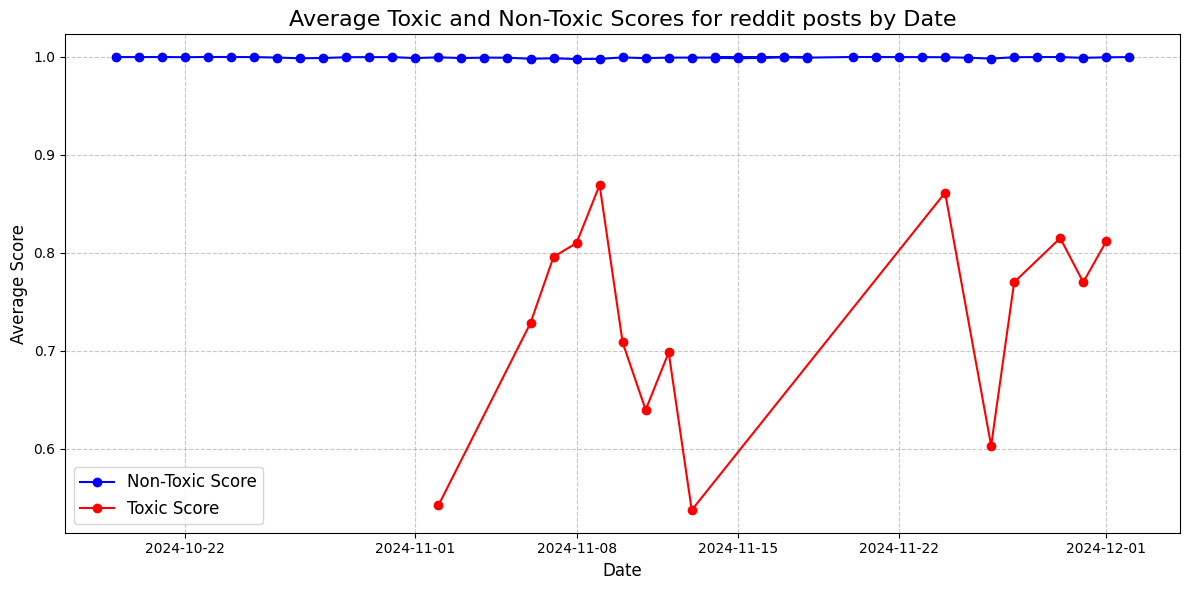

In [192]:
# Plot the data
if non_toxic_df is not None and toxic_df is not None:
    plot_avg_toxic_scores(non_toxic_df, toxic_df,"Average Toxic and Non-Toxic Scores for reddit posts by Date")

## Engagement vs Toxicity

In [193]:
query_engagement_scores = """
select 
	post_id, 
    count(comment_id), 
    avg(score) as score, 
    avg(toxic_score) as toxicity_score 
from 
	comments 
where 
	toxic_class='flag'
group by 
	post_id,score,toxic_score 
order by 
	score desc 
limit 1000;
"""

In [194]:
# query_engagement_scores = """
# select 
#     comment_id,
#     score,
#     toxic_score as toxicity_score 
# from 
# 	comments 
# where 
# 	toxic_class='flag' 
# order by 
# 	score desc 
# limit 1000;
# """

In [195]:
engagement_scores_df_before_nov17 = fetch_data_from_reddit_db(DATABASE_URL, query_engagement_scores)

/tmp/ipykernel_1457687/2278954275.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [196]:
engagement_scores_df_before_nov17.head()

,post_id,count,score,toxicity_score
0,1gbf2ck,1,193.0,0.854354
1,1gnks8m,1,170.0,0.828893
2,1gkkjwb,1,167.0,0.989168
3,1gpp7yx,1,145.0,0.513910
4,1gqhpg4,1,107.0,0.956936


In [197]:


def plot_score_vs_toxicity(data, title, x_axis, y_axis, x_label, y_label):
    """
    Plot a scatter plot for score vs. toxicity_score.

    Args:
        data (pd.DataFrame): DataFrame containing 'score' and 'toxicity_score'.
    """
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot with a color map
    scatter = plt.scatter(
        data[x_axis], 
        data[y_axis], 
        c=data[y_axis], 
        cmap='cool', 
        s=50, 
        alpha=0.7
    )
    
    # Add a color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Toxicity Score Intensity', fontsize=12)


    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.xscale('log')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.colorbar(plt.cm.ScalarMappable(cmap='cool'), label='Toxicity Intensity')
    plt.tight_layout()
    plt.show()



### Fig : Engagement vs toxicity - top 1000 posts

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

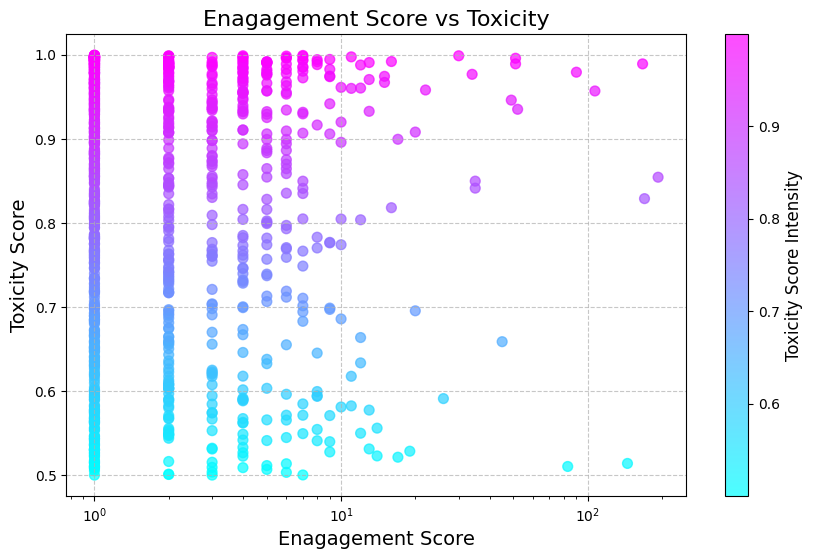

In [198]:
# Assuming the DataFrame is named df
plot_score_vs_toxicity(engagement_scores_df_before_nov17, title="Enagagement Score vs Toxicity" ,
                       x_axis='score', y_axis='toxicity_score',
                       x_label='Enagagement Score', y_label='Toxicity Score')

## Total flag and normal class - Comments

In [199]:
query_class_distribution_before_nov17 = """
select 
    toxic_class, count(*) 
from 
    comments 
where 
    toxic_class = 'flag' or toxic_class = 'normal'
group by
    toxic_class;
"""

query_class_distribution_after_nov17 = """
select 
    toxic_class, count(*) 
from 
    comments_from_nov17th
where 
    toxic_class = 'flag' or toxic_class = 'normal'
group by
    toxic_class;
"""

In [200]:
class_distribution_before_nov17_df = fetch_data_from_reddit_db(DATABASE_URL, query_class_distribution_before_nov17)
class_distribution_after_nov17_df = fetch_data_from_reddit_db(DATABASE_URL, query_class_distribution_after_nov17)

/tmp/ipykernel_1457687/2278954275.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [201]:
class_distribution_df = pd.concat([class_distribution_before_nov17_df, class_distribution_after_nov17_df])

In [202]:
# class_distribution_df = class_distribution_df. drop_duplicates(subset='content', keep='first')
class_distribution_df = class_distribution_df.groupby('toxic_class', as_index=False)['count'].sum()

In [203]:
class_distribution_df.head()

,toxic_class,count
0,flag,6807
1,normal,541612


In [205]:
def plot_posts_per_class(df):
    try:
        plt.figure(figsize=(10, 6))
        plt.bar(df['toxic_class'], df['count'],  color=['skyblue', 'orange'])
        plt.title("Posts Count Per toxic class", fontsize=16)
        plt.xlabel("Board", fontsize=12)
        plt.ylabel("Posts Count", fontsize=12)
        plt.yscale('log')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting histogram: {e}")

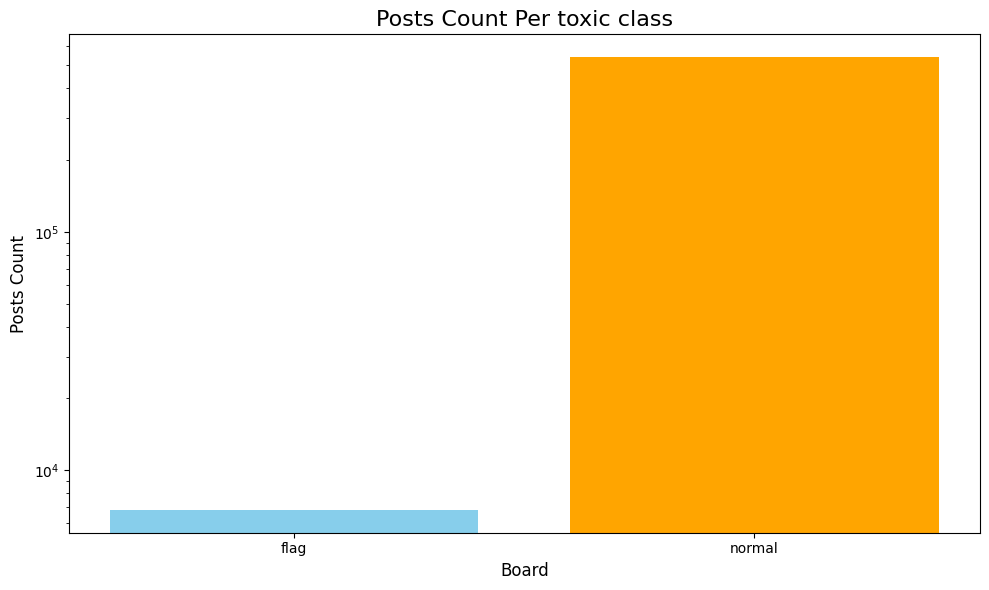

In [206]:
plot_posts_per_class(class_distribution_df)

## Sentiment analysis for posts

In [ ]:
query_post_content_before_nov17 = """
select 
    concat(title, ':', content) as content 
from 
    posts
limit 
    100;
"""

query_post_content_after_nov17 = """
select 
    concat(title, ':', content) as content 
from 
    posts_from_nov17
limit 
    100;
"""

In [ ]:
post_content_before_nov17_df = fetch_data_from_reddit_db(DATABASE_URL, query_post_content_before_nov17)
posts_content_after_nov17_df = fetch_data_from_reddit_db(DATABASE_URL, query_post_content_after_nov17)


/tmp/ipykernel_1457687/2278954275.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [ ]:
post_content_df = pd.concat([post_content_before_nov17_df, posts_content_after_nov17_df])

In [ ]:
post_content_df = post_content_df. drop_duplicates(subset='content', keep='first')
# toxic_class_dist_df = toxic_class_dist_df.groupby('date', as_index=False)['count'].sum()

In [ ]:
post_content_df.head()

,content
0,"Vienna Open R1: Mensik def. [8] Popyrin, 7-6(3..."
1,"Vienna Open R1: [1] Zverev def. Schwaerzler, 6..."
2,Interview with Gabriel Diallo in September on ...
3,"Basel Open R1: [7] Fils def. Altmaier, 7-6(5) ..."
4,"[Ojeda] 2024 #MLS Average Attendance: 23,347:"


In [ ]:
from transformers import AutoModelForSequenceClassification

# Load the model
model_name = "allenai/longformer-base-4096"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Check the label mapping
label_mapping = model.config.id2label  # Mapping from index to label
print(label_mapping)


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{0: 'LABEL_0', 1: 'LABEL_1'}


In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline
model_name = "allenai/longformer-base-4096"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

# Test with positive and negative examples
texts = ["I love this!", "Go to hell!"]
results = sentiment_pipeline(texts)

# Output the labels and their corresponding texts
for text, result in zip(texts, results):
    print(f"Text: {text} -> Sentiment: {result['label']} (Score: {result['score']})")

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Text: I love this! -> Sentiment: LABEL_1 (Score: 0.5326904058456421)
Text: Go to hell! -> Sentiment: LABEL_1 (Score: 0.5308326482772827)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load Longformer sentiment analysis model
model_name = "allenai/longformer-base-4096"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a pipeline
long_sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Perform sentiment analysis
def analyze_sentiments(texts):
    """
    Analyze sentiment of a list of comments using a Hugging Face sentiment-analysis pipeline.

    Args:
        comments (list): List of text comments.

    Returns:
        pd.DataFrame: DataFrame with sentiment and scores.
    """
    results = long_sentiment_analyzer(texts)
    return pd.DataFrame(results)


/home/mvenkatarama/Documents/DSSMP/Projects/project1_impl/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-01 22:17:02.142552: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 22:17:02.254818: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 22:17:03.286817: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 22:17:03.870507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cu

In [ ]:
# Analyze sentiments for all comments
sentiment_df = analyze_sentiments(post_content_df['content'].tolist())

Initializing global attention on CLS token...
Input ids are automatically padded to be a multiple of `config.attention_window`: 512


In [ ]:
# Combine sentiment results with original DataFrame
post_content_df['sentiment'] = sentiment_df['label']
post_content_df['score'] = sentiment_df['score']

In [ ]:
# Define the mapping
label_mapping = {"LABEL_0": "negative", "LABEL_1": "positive"}

# Apply the mapping to the 'sentiment' column
post_content_df["sentiment"] = post_content_df["sentiment"].map(label_mapping)

In [ ]:
post_content_df.head()

,content,sentiment,score
0,"Vienna Open R1: Mensik def. [8] Popyrin, 7-6(3...",positive,0.506214
1,"Vienna Open R1: [1] Zverev def. Schwaerzler, 6...",positive,0.506786
2,Interview with Gabriel Diallo in September on ...,positive,0.502497
3,"Basel Open R1: [7] Fils def. Altmaier, 7-6(5) ...",positive,0.506440
4,"[Ojeda] 2024 #MLS Average Attendance: 23,347:",positive,0.507560


/tmp/ipykernel_1457687/976723664.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=posts_df, x='sentiment', palette='coolwarm')


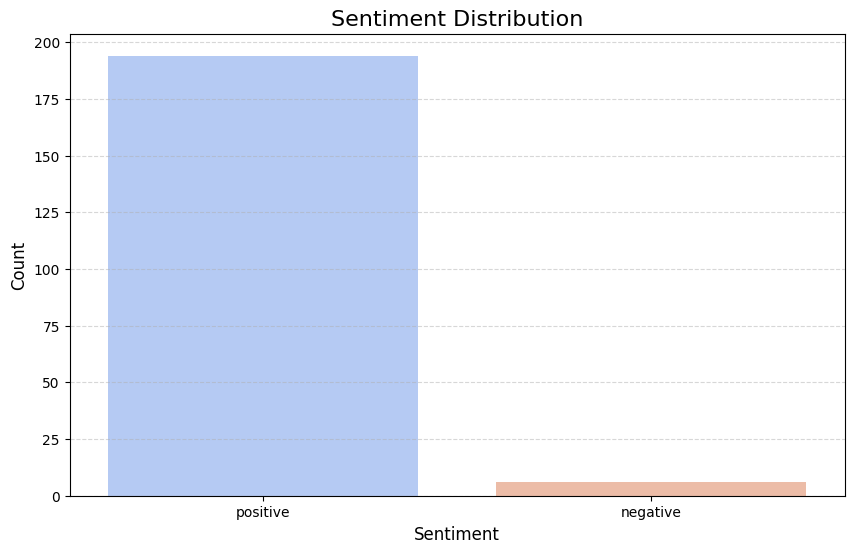

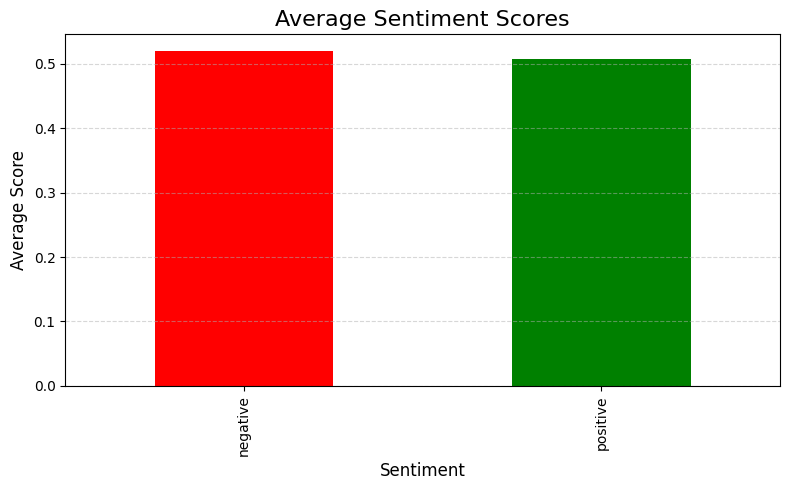

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiments(posts_df):
    """
    Plot sentiment distributions and average sentiment scores.

    Args:
        posts_df (pd.DataFrame): DataFrame with 'sentiment' and 'score' columns.
    """
    # Countplot for sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=posts_df, x='sentiment', palette='coolwarm')
    plt.title("Sentiment Distribution", fontsize=16)
    plt.xlabel("Sentiment", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    
    # Average sentiment scores by sentiment
    avg_scores = posts_df.groupby('sentiment')['score'].mean()
    avg_scores.plot(kind='bar', figsize=(8, 5), color=['red', 'green'])
    plt.title("Average Sentiment Scores", fontsize=16)
    plt.xlabel("Sentiment", fontsize=12)
    plt.ylabel("Average Score", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot the results
plot_sentiments(post_content_df)
